In [225]:
import datetime as dt

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns

In [40]:
plt.rcParams["figure.figsize"] = 15, 10

# Descarga de datos

In [34]:
# Se lee el csv con la lista de tickers y nos quedamos únicamente con el Symbol.
tickers_list = pd.read_csv("data/tickers_list.csv", usecols=["Symbol"])
tickers_list.index = tickers_list["Symbol"]

In [35]:
# Rango de fechas para trabajar
start_date = dt.datetime(2019, 1, 1)
end_date = dt.datetime.today()

In [176]:
data = pdr.DataReader(name=tickers_list[:10], data_source="yahoo", start=start_date, end=end_date)["Adj Close"]

/home/luis/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ABNB.MX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


# Preprocesamiento

## Imputación de datos nulos y filtro de tickers con más del 50% de datos faltantes

In [177]:
# Se eliminan columnas duplicadas
data = data.loc[:, ~data.columns.duplicated()]

In [178]:
# Se eliminan las columnas con más del 50% de datos faltantes
nan_tickers_entries = (data.isna()).sum().to_frame()
nan_tickers_entries.columns = ["no_data"]

tickers_to_drop = nan_tickers_entries.query(f"no_data > {data.shape[0]//2}").index.to_numpy()
data.drop(tickers_to_drop, axis=1, inplace=True)

In [179]:
# Se reemplazan los Nan con ceros.
data.fillna(0, inplace=True)

In [182]:
data.tail()

Symbols,ADSK.MX,AMXA.MX,AMXL.MX,ATVI.MX,ACOFN.MX,AIN.MX,AIRN.MX,ANTM.MX
Date,,,,,,,,
2019-12-24,3488.0,13.960070,14.230431,1119.292847,757.305481,2659.488037,2768.162842,5667.975098
2019-12-26,3488.0,14.033932,14.352139,1111.137085,757.305481,2659.488037,2768.162842,5667.975098
2019-12-27,3488.0,14.126261,14.427036,1111.137085,757.305481,2659.488037,2768.162842,5667.975098
2019-12-30,3467.0,14.126261,14.230431,1119.422852,757.305481,2659.488037,2768.162842,5667.975098
2019-12-31,3467.0,14.126261,14.230431,1119.422852,757.305481,2659.488037,2768.162842,5667.975098


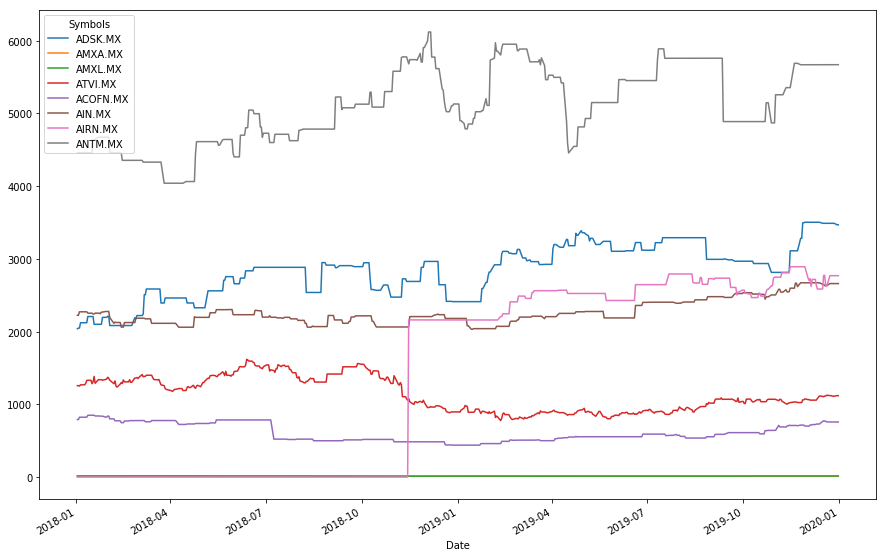

In [181]:
data.plot()

## Estandarización

In [209]:
standarized_data = (data - data.mean()) / np.sqrt( ( (data - data.mean())**2 ).sum() / (data.shape[0] - 1) )

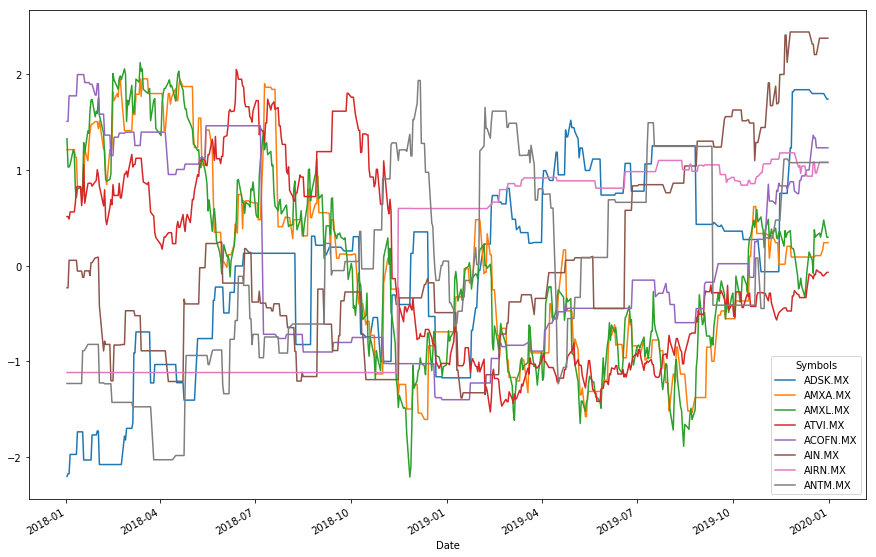

In [210]:
standarized_data.plot()

## Media móvil a 15 días

In [211]:
ma_data = data.rolling(window=15).mean()

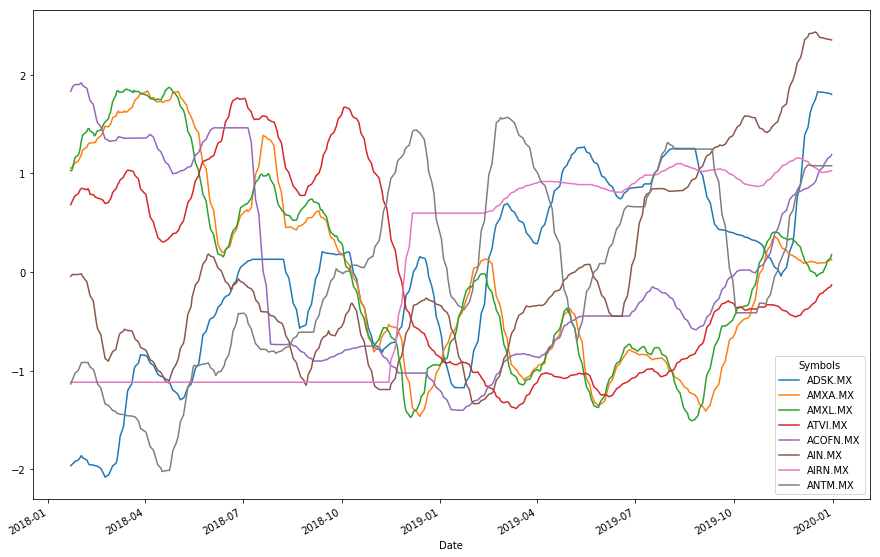

In [212]:
ma_data.plot()

## Derivada de la media móvil

In [213]:
diff_data = ma_data.diff()

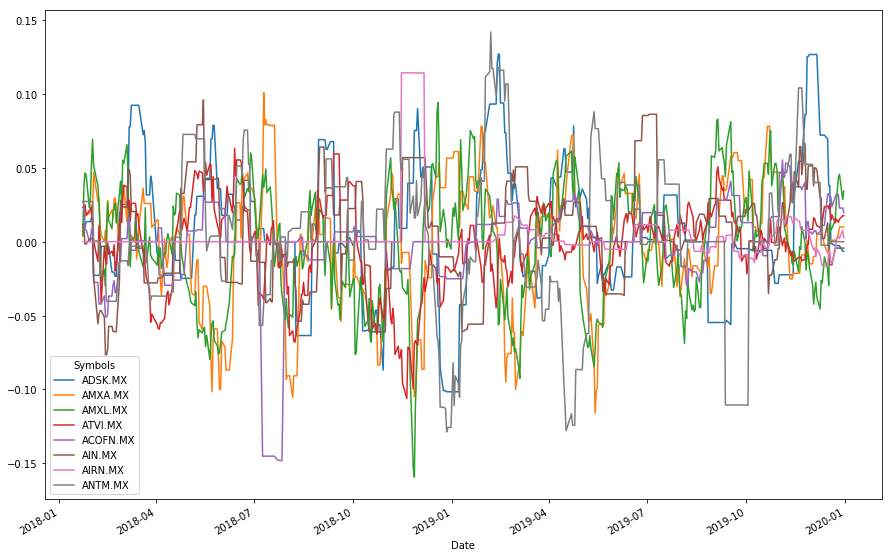

In [214]:
diff_data.plot()

# Matrices de correlación

In [221]:
corr = diff_data.corr()

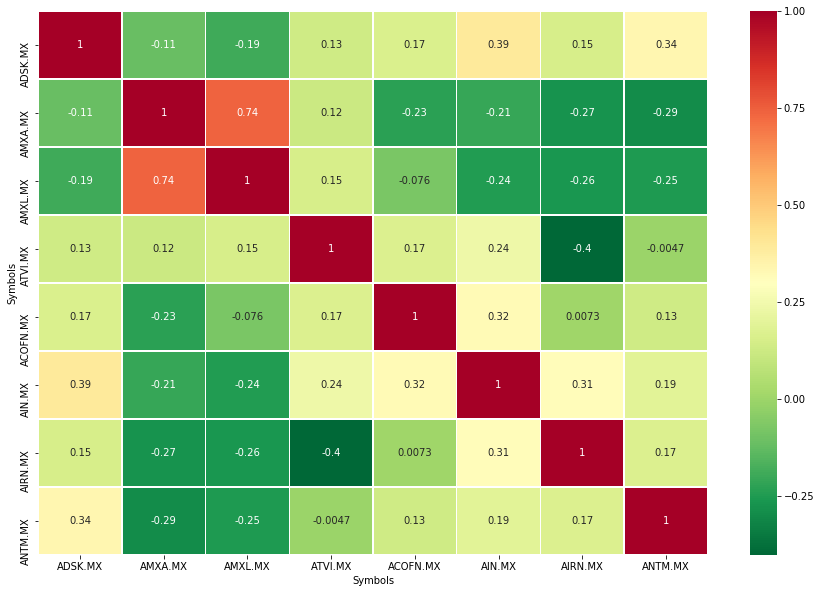

In [226]:
sns.heatmap(corr, cmap='RdYlGn_r', linewidths=0.5, annot=True)

# Matriz de distancia

$d_{ij} = \sqrt{2(1-\rho_{ij})}$

Text(0.5, 1.0, 'correlación vs distancia')

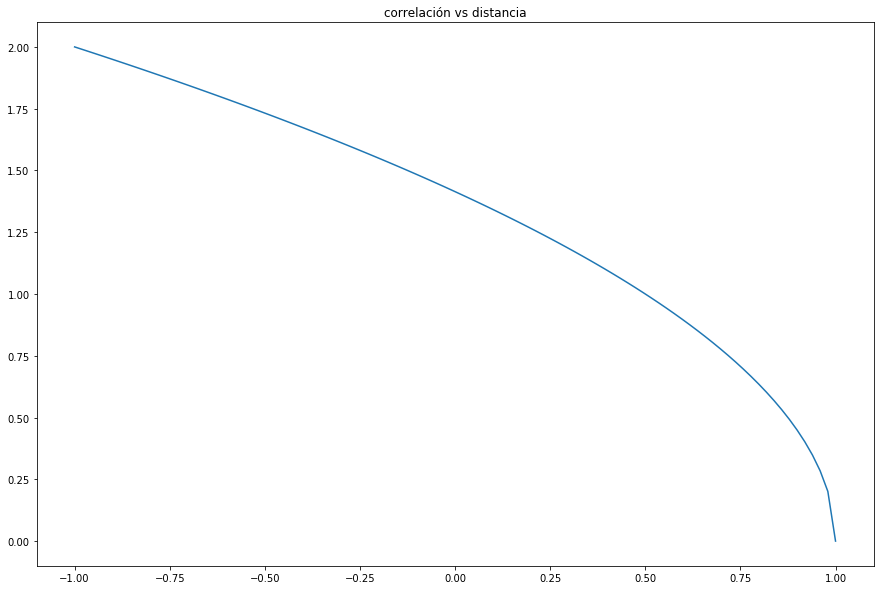

In [228]:
x = np.linspace(-1,1,100)
plt.plot(x, np.sqrt(2*(1-x)))
plt.title("correlación vs distancia")

In [230]:
dist_matrix = np.sqrt(2*(1-corr))

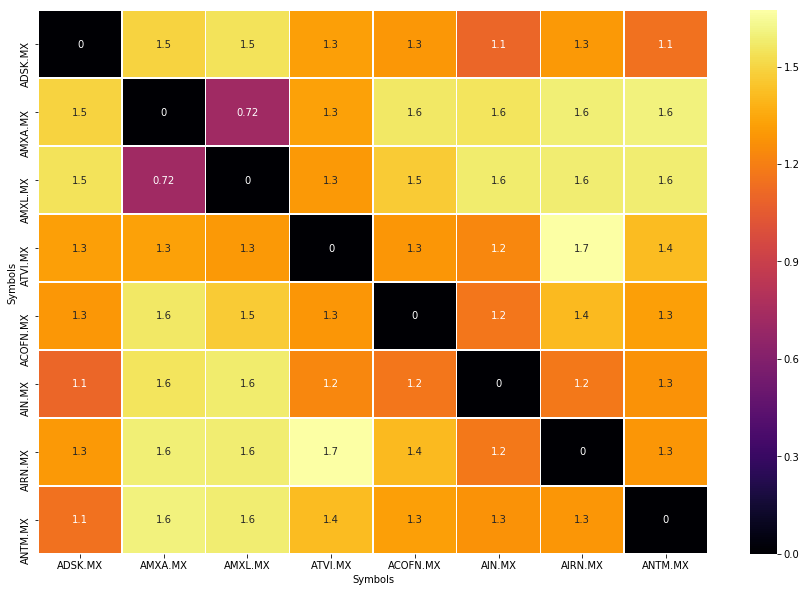

In [235]:
sns.heatmap(dist_matrix, cmap='inferno', linewidths=0.5, annot=True)